# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [4]:
# Import librerias: 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

In [5]:
url='https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/dataset.csv'
df=pd.read_csv(url, sep=',')

In [6]:
df.head(10)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
5,1011,10138,1198,11.816926,1130,11.146183,1395,13.760110,1446,14.263168,...,873,20.6,19.4,21.9,1651,4.5,4.2,4.8,360,6
6,1013,19680,2351,11.946138,2461,12.505081,2286,11.615854,2337,11.875000,...,1741,18.6,17.5,19.5,2841,4.3,4.1,4.6,662,6
7,1015,114277,13141,11.499252,14637,12.808352,15463,13.531157,13865,12.132800,...,9158,14.7,13.6,15.7,13182,3.6,3.3,3.8,3204,4
8,1017,33615,3869,11.509743,3812,11.340176,4380,13.029897,3734,11.108136,...,2870,17.5,16.6,18.5,4664,4.0,3.8,4.2,1068,5
9,1019,26032,2554,9.811002,2981,11.451291,2852,10.955747,2504,9.618931,...,2540,15.9,14.7,17.2,3353,3.9,3.6,4.2,814,6


In [7]:
pd.options.display.max_columns=200
pd.options.display.max_rows=200
df.sample(40)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,COUNTY_NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
1748,32007,52460,7781,14.832253,7764,14.799848,7191,13.707587,7574,14.437667,6405,12.209302,6755,12.876477,5223,9.956157,2594,4.944720,1173,2.235989,46163,87.996569,731,1.393443,3394,6.469691,684,1.303851,138,0.263058,1350,2.573389,52460,89,792,13.6,6.9,6.7,-0.2,-4.8,-5.0,4906,9833,12408,6055,14.8,29.6,37.4,18.2,4276,8.3,10.1,9.3,79134,73009,85259,27148,26260,888,3.3,79134,134.7,213.5,185.8,72.3,65.0,5.6,5.0,14.539605,9.145601,0.760693,24.394033,15.576913,53.352223,7,52377,8008,15.3,Elko,Nevada,32,7,38162,41.2,39.4,42.8,15710,31.1,29.8,32.4,11868,6.4,5.9,7.1,2456,7.6,6.6,8.7,2886,9.7,9.0,10.3,3692,2.7,2.6,2.9,1036,5
1114,22007,22300,2508,11.246637,2771,12.426009,2834,12.708520,2652,11.892377,2667,11.959641,3273,14.677130,2911,13.053812,1781,7.986547,903,4.049327,15164,68.000000,6610,29.641256,169,0.757848,96,0.430493,15,0.067265,246,1.103139,22300,-280,199,11.2,10.3,0.8,0.4,-13.8,-13.3,4103,6798,3049,1589,26.4,43.7,19.6,10.2,4562,20.7,28.7,27.8,48120,42840,53400,8941,8345,596,6.7,48120,100.2,260.3,231.8,84.1,75.8,9.1,7.8,11.312757,3.670425,0.756098,11.997074,8.575491,35.857229,0,22881,5211,22.8,Assumption,Louisiana,22,7,17508,50.6,48.7,52.3,8867,39.1,37.8,40.5,6846,9.8,9.0,10.5,1709,11.6,10.3,12.9,2033,16.0,15.0,16.9,2801,3.9,3.7,4.1,682,6
2275,42067,24704,2896,11.722798,3169,12.827882,2728,11.042746,2779,11.249190,2888,11.690415,3500,14.167746,3258,13.188148,2164,8.759715,1322,5

In [8]:
df.corr()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,40-49 y/o % of total pop,50-59,50-59 y/o % of total pop,60-69,60-69 y/o % of total pop,70-79,70-79 y/o % of total pop,80+,80+ y/o % of total pop,White-alone pop,% White-alone,Black-alone pop,% Black-alone,Native American/American Indian-alone pop,% NA/AI-alone,Asian-alone pop,% Asian-alone,Hawaiian/Pacific Islander-alone pop,% Hawaiian/PI-alone,Two or more races pop,% Two or more races,POP_ESTIMATE_2018,N_POP_CHG_2018,GQ_ESTIMATES_2018,R_birth_2018,R_death_2018,R_NATURAL_INC_2018,R_INTERNATIONAL_MIG_2018,R_DOMESTIC_MIG_2018,R_NET_MIG_2018,Less than a high school diploma 2014-18,High school diploma only 2014-18,Some college or associate's degree 2014-18,Bachelor's degree or higher 2014-18,Percent of adults with less than a high school diploma 2014-18,Percent of adults with a high school diploma only 2014-18,Percent of adults completing some college or associate's degree 2014-18,Percent of adults with a bachelor's degree or higher 2014-18,POVALL_2018,PCTPOVALL_2018,PCTPOV017_2018,PCTPOV517_2018,MEDHHINC_2018,CI90LBINC_2018,CI90UBINC_2018,Civilian_labor_force_2018,Employed_2018,Unemployed_2018,Unemployment_rate_2018,Median_Household_Income_2018,Med_HH_Income_Percent_of_State_Total_2018,Active Physicians per 100000 Population 2018 (AAMC),Total Active Patient Care Physicians per 100000 Population 2018 (AAMC),Active Primary Care Physicians per 100000 Population 2018 (AAMC),Active Patient Care Primary Care Physicians per 100000 Population 2018 (AAMC),Active General Surgeons per 100000 Population 2018 (AAMC),Active Patient Care General Surgeons per 100000 Population 2018 (AAMC),Total nurse practitioners (2019),Total physician assistants (2019),Total Hospitals (2019),Internal Medicine Primary Care (2019),Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),ICU Beds_x,Total Population,Population Aged 60+,Percent of Population Aged 60+,STATE_FIPS,CNTY_FIPS,county_pop2018_18 and older,anycondition_prevalence,anycondition_Lower 95% CI,anycondition_Upper 95% CI,anycondition_number,Obesity_prevalence,Obesity_Lower 95% CI,Obesity_Upper 95% CI,Obesity_number,Heart disease_prevalence,Heart disease_Lower 95% CI,Heart disease_Upper 95% CI,Heart disease_number,COPD_prevalence,COPD_Lower 95% CI,COPD_Upper 95% CI,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
fips,1.000000,-0.056079,-0.049580,-0.010586,-0.053130,0.018994,-0.053591,-0.030310,-0.051715,-0.045491,-0.054239,-0.051777,-0.057730,-0.007890,-0.060851,0.036143,-0.070460,0.040678,-0.069895,0.039802,-0.052099,0.137095,-0.041127,-0.130194,-0.064405,-0.001718,-0.061055,-0.076854,-0.055792,-0.048134,-0.069552,-0.049813,-0.056079,-0.020355,-0.056912,-0.034638,-0.017157,-0.010067,0.043293,0.036635,0.045086,-0.056196,-0.052330,-0.063897,-0.052762,-0.004694,0.003130,-0.054556,0.030866,-0.053726,-0.086429,-0.094407,-0.098582,0.042657,0.039818,0.045038,-0.054097,-0.053902,-0.057558,-0.105372,0.042657,0.011284,0.075255,0.061215,0.012989,-0.014039,0.126417,0.104767,-0.059903,-0.038218,-0.030419,-0.055315,-0.047988,-0.050077,-0.052409,-0.056233,-0.065207,0.047686,0.999975,0.172777,-0.057449,0.028766,0.024075,0.033331,-0.052585,0.084044,0.079244,0.088737,-0.046061,0.007443,0.001159,0.012330,-0.060668,-0.075188,-0.082630,-0.069494,-0.063463,-0.031057,-0.036327,-0.026483,-0.056055,-0.040631,-0.044576,-0.033649,-0.062322,-0.008345
TOT_POP,-0.056079,1.000000,0.994010,0.052507,0.994596,0.023384,0.994558,0.160254,0.995526,0.295635,0.998031,0.184424,0.997000,-0.092164,0.993624,-0.215300,0.980942,-0.207271,0.970889,-0.175148,0.988500,-0.153597,0.798709,0.087330,0.748573,-0.043600,0.840339,0.476078,0.478293,0.033349,0.898469,0.123643,1.000000,0.446357,0.889263,0.081277,-0.202414,0.184506,0.272763,0.001055,0.052902,0.947348

In [9]:
# calculo la correlación:
df.corr().style.background_gradient(cmap='Blues')

In [10]:
df[['R_birth_2018', 'R_death_2018', 'Employed_2018','Unemployed_2018']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R_birth_2018     3140 non-null   float64
 1   R_death_2018     3140 non-null   float64
 2   Employed_2018    3140 non-null   int64  
 3   Unemployed_2018  3140 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 98.2 KB


In [11]:
df_frac=df[['R_birth_2018', 'R_death_2018', 'Employed_2018','Unemployed_2018']]

In [12]:
df_frac.describe()

,R_birth_2018,R_death_2018,Employed_2018,Unemployed_2018
count,3140.000000,3140.000000,3.140000e+03,3140.000000
mean,11.167739,10.365287,4.947048e+04,2005.100318
std,2.522839,2.687543,1.619570e+05,6971.115396
min,0.000000,0.000000,0.000000e+00,0.000000
25%,9.700000,8.700000,4.714500e+03,200.750000
50%,11.000000,10.400000,1.111500e+04,483.000000
75%,12.400000,12.200000,3.034400e+04,1276.250000
max,30.100000,21.900000,4.896512e+06,239829.000000


In [13]:
df_frac.corr().style.background_gradient(cmap='Blues')

,R_birth_2018,R_death_2018,Employed_2018,Unemployed_2018
R_birth_2018,1.000000,-0.211637,0.077301,0.080367
R_death_2018,-0.211637,1.000000,-0.210241,-0.180803
Employed_2018,0.077301,-0.210241,1.000000,0.979277
Unemployed_2018,0.080367,-0.180803,0.979277,1.000000


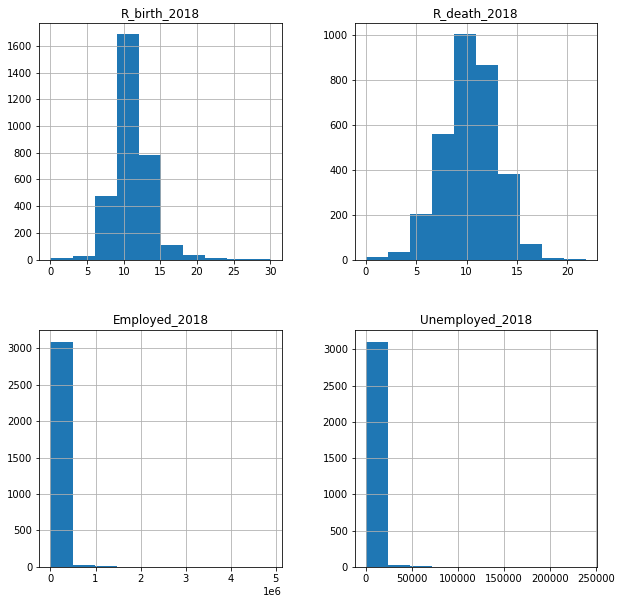

In [14]:
df_frac.hist(figsize=(10,10),sharex=False)
plt.show()

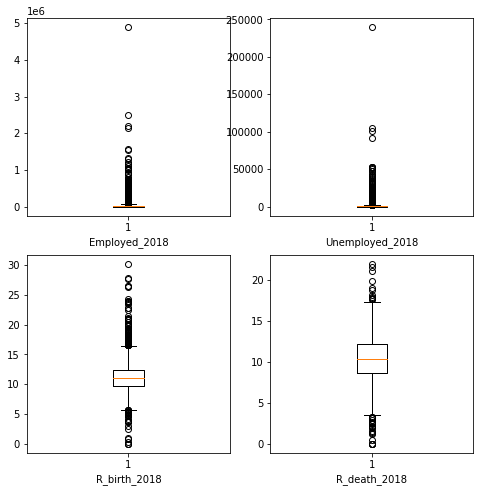

In [15]:
fig,ax=plt.subplots(2,2,figsize=(8,8))
ax[0,0].boxplot(df_frac['Employed_2018'])
ax[0,0].set_xlabel('Employed_2018')
ax[0,1].boxplot(df_frac['Unemployed_2018'])
ax[0,1].set_xlabel('Unemployed_2018')
ax[1,0].boxplot(df_frac['R_birth_2018'])
ax[1,0].set_xlabel('R_birth_2018')
ax[1,1].boxplot(df_frac['R_death_2018'])
ax[1,1].set_xlabel('R_death_2018')

plt.show()

In [16]:
# ver los 0 
df_frac[df_frac['R_birth_2018']==0]

,R_birth_2018,R_death_2018,Employed_2018,Unemployed_2018
546,0.0,0.0,0,0
2919,0.0,11.0,2290,111
2921,0.0,14.4,2231,111


In [17]:
df_frac[df_frac['R_death_2018']==0]

,R_birth_2018,R_death_2018,Employed_2018,Unemployed_2018
92,6.6,0.0,225,20
546,0.0,0.0,0,0
2651,9.3,0.0,233,9
2655,10.6,0.0,208,6
2671,27.8,0.0,98,4


In [18]:
df_frac[df_frac['Employed_2018']==0]

,R_birth_2018,R_death_2018,Employed_2018,Unemployed_2018
546,0.0,0.0,0,0


In [19]:
df_frac[df_frac['Unemployed_2018']==0]

,R_birth_2018,R_death_2018,Employed_2018,Unemployed_2018
546,0.0,0.0,0,0


In [20]:
# escalar los datos:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso

In [21]:
X=df_frac.drop(columns="Employed_2018")
y=df_frac["Employed_2018"]

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=57)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

Input Training: (2355, 3)
Input Test: (785, 3)
Output Training: (2355,)
Output Test: (785,)


In [23]:
# medidas de tendencia central y disperción  
X_train.describe()

,R_birth_2018,R_death_2018,Unemployed_2018
count,2355.000000,2355.000000,2355.000000
mean,11.174395,10.376858,1878.798726
std,2.436138,2.711028,5108.793840
min,0.000000,0.000000,4.000000
25%,9.700000,8.700000,198.000000
50%,11.000000,10.400000,488.000000
75%,12.400000,12.200000,1288.500000
max,27.800000,21.600000,105409.000000


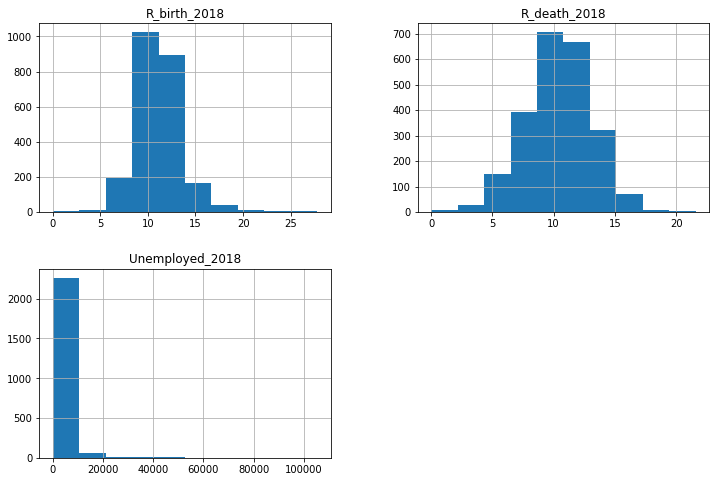

In [24]:
# Analisis univariado
X_train.hist(figsize=(12,8))
plt.show()

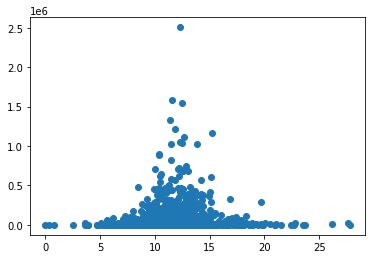

In [25]:
# analisis bivariado
plt.scatter(x=X_train['R_birth_2018'],y=y_train)
plt.show()

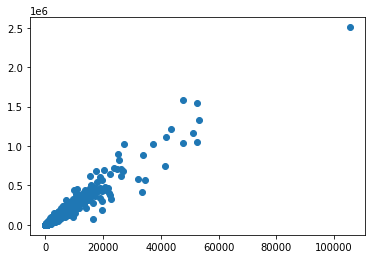

In [26]:
plt.scatter(x=X_train['Unemployed_2018'],y=y_train)
plt.show()

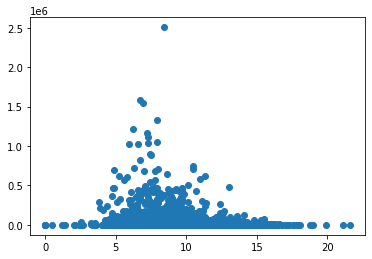

In [27]:
plt.scatter(x=X_train['R_death_2018'],y=y_train)
plt.show()

In [28]:
# Antes realizar la separación entre muestra de entrenamiento y prueba

In [29]:
scaler=MinMaxScaler()
scaler.fit(df_frac)
scaler.transform(df_frac)

array([[3.92026578e-01, 4.38356164e-01, 5.10873863e-03, 3.92779856e-03],
       [3.48837209e-01, 4.70319635e-01, 1.84735583e-02, 1.41475802e-02],
       [3.45514950e-01, 5.89041096e-01, 1.62156245e-03, 1.80545305e-03],
       ...,
       [4.48504983e-01, 3.28767123e-01, 1.74430288e-03, 1.62615864e-03],
       [3.08970100e-01, 4.88584475e-01, 7.93626157e-04, 7.17177656e-04],
       [3.15614618e-01, 4.42922374e-01, 7.35217232e-04, 5.46222517e-04]])

In [30]:
# modelo de regresion lineal 
modelo = LinearRegression(normalize=True)
modelo.fit(X_train,y_train)
score=modelo.score(X_train,y_train)
print(f'score is{score: .4f}')

score is 0.9454


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [31]:
# la linea esta definida por las caracteristicas y por la pendiente. De hecho, podemos inspeccionar la intersección(intercept_) y la pendiente (coef_)
print(modelo.intercept_)

26319.50727113126


In [32]:
print(np.round(modelo.coef_))

[ -733. -1660.    25.]


In [33]:
# se corre el dataset de prueba:
predictions=modelo.predict(X_test)
print(f'The R2 score is:{r2_score(y_test,predictions)}')
print(f'The RSME is:{mean_squared_error(y_test,predictions, squared=False)}')

The R2 score is:0.9613208835570596
The RSME is:45854.57307490475


**Lasso**

In [34]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=3)
clf.fit(X,y)
Lasso(alpha=3)
print(clf.coef_)
print(clf.intercept_)

[ -549.01274569 -2171.97684799    22.61570119]
32768.12254036439


In [35]:
# aplicando lasso: no sería necesrio ya que sin la regularizacion me dio un score bueno.
clf.fit(X_train,y_train)
score=clf.score(X_train,y_train)
print(f'score is{score: .4f}')

score is 0.9454


**Ridge**

In [36]:
clf_r =linear_model.Ridge(alpha=3)
clf_r.fit(X_train,y_train,sample_weight=None)
score=clf_r.score(X_train,y_train,sample_weight=None)
print(f'score is{score: .4f}')

score is 0.9454
